#<b>Проект: Исследование поведения покупателей на распродаже Black Friday.</b>

##<b>Описание проекта</b>

Розничная компания <i>«ABC Private Limited»</i> хочет понять поведение покупателей (конкретно - сумму покупки) по различным продуктам разных категорий.

Данная компания предоставила сводку покупок клиентов для выбранных продуктов высокого объема продаж за прошлый месяц.

Набор данных содержит демографическую информацию о клиентах, детали о продуктах и общую сумму покупки за прошлый месяц.

##<b>Описание данных</b>

- <b>User_ID</b> - идентификатор пользователя;
- <b>Product_ID</b> - идентификатор товара;
- <b>Gender</b> - пол;
- <b>Age</b> - возраст;
- <b>Occupation</b> - занятость;
- <b>City_Category</b> - тип города;
- <b>Stay_In_Current_City_Years</b> - время пребывания в текущем городе;
- <b>Marital_Status</b> - семейное положение;
- <b>Product_Category_1</b> - категория товара №1;
- <b>Product_Category_2</b> - категория товара №2;
- <b>Product_Category_3</b> - категория товара №3;
- <b>Purchase</b> - сумма покупки.


##<b>Задачи исследования</b>

<b>Предобработка данных</b>

- Исправим нарушения стиля в наименовании столбцов;
- Проверим пропуски и типы данных. Откорректируем, если это потребуется;
- Проверим данные на дубликаты.

<b>Исследовательский анализ данных</b>
- Проверим наличие выбросов;
- Отобразим распредение покупок;
- Общая потраченная сумма в зависимости от гендера;
- Общая потраченная сумма в зависимости от категории возраста;
- Общая потраченная сумма в зависимости от занятости;
- Общая потраченная сумма в зависимости от категории города;
- Общая потраченная сумма в зависимости от семейного положения;
- Общая потраченная сумма в зависимости от категории продукта 1, 2 и 3;
- Общая потраченная сумма в зависимости от продолжительности пребывания в городе;
- Процентная часть категории города от общего количества;
- Топ 5 пользователей с самыми высокими затратами и топ 5 самых часто покупаемых продуктов.


<b>Общий вывод</b>

In [112]:
! gdown --id 1MzM5xjrGNaFAmRMQZMleaa7zHK80xBKA

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1MzM5xjrGNaFAmRMQZMleaa7zHK80xBKA
To: /content/black_friday.csv
100% 25.5M/25.5M [00:00<00:00, 72.0MB/s]


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv('black_friday.csv')

In [116]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


##<b>Предобработка данных</b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [117]:
df.columns = df.columns.str.lower()

In [118]:
df.isna().mean()

user_id                       0.000000
product_id                    0.000000
gender                        0.000000
age                           0.000000
occupation                    0.000000
city_category                 0.000000
stay_in_current_city_years    0.000000
marital_status                0.000000
product_category_1            0.000000
product_category_2            0.315666
product_category_3            0.696727
purchase                      0.000000
dtype: float64

In [119]:
df.duplicated().sum()

0

In [120]:
df['product_category_2'] = df['product_category_2'].fillna('0').astype(int)

In [121]:
df['product_category_3'] = df['product_category_3'].fillna('0').astype(int)

##<b>Исследовательский анализ данных</b>

###Проверим наличие выбросов

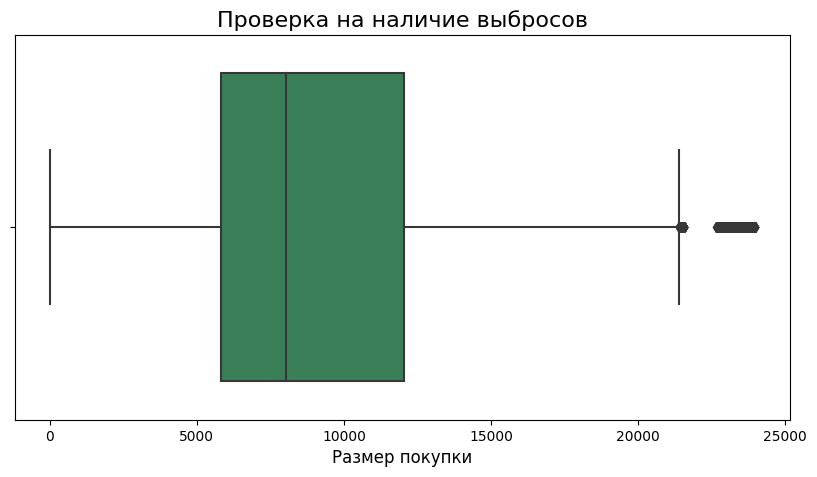

In [122]:
plt.figure(figsize=(10, 5))
sns.boxplot(df, x='purchase', color='SeaGreen')
plt.xlabel('Размер покупки', fontsize=12)
plt.title('Проверка на наличие выбросов', fontsize=16)
plt.show()


###Отобразим распределение покупок

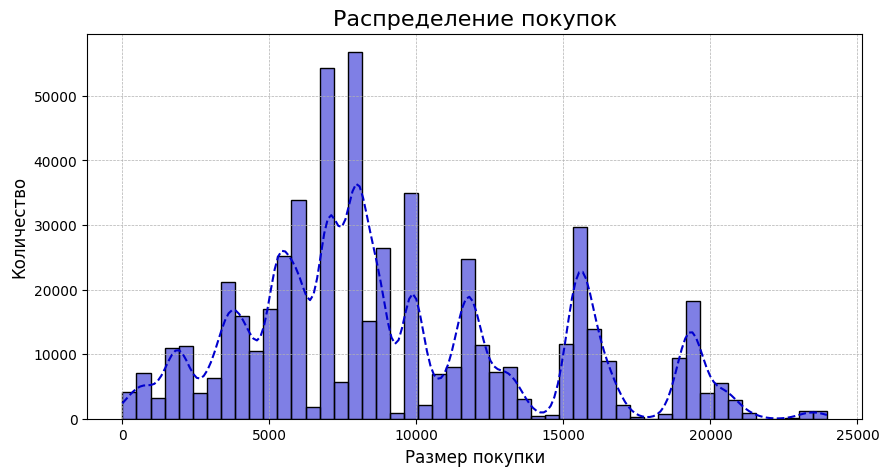

In [123]:
plt.figure(figsize=(10, 5))
sns.histplot(df, x='purchase', bins=50, color='MediumBlue', alpha = 0.5, kde=True, line_kws = {'linestyle': '--'})
plt.xlabel('Размер покупки', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Распределение покупок', fontsize=16)
plt.grid(linewidth = 0.5, linestyle = '--')
plt.show()

### Общая потраченная сумма в зависимости от гендера

Text(0.5, 1.0, 'Общая потраченная сумма в зависимости от гендера')

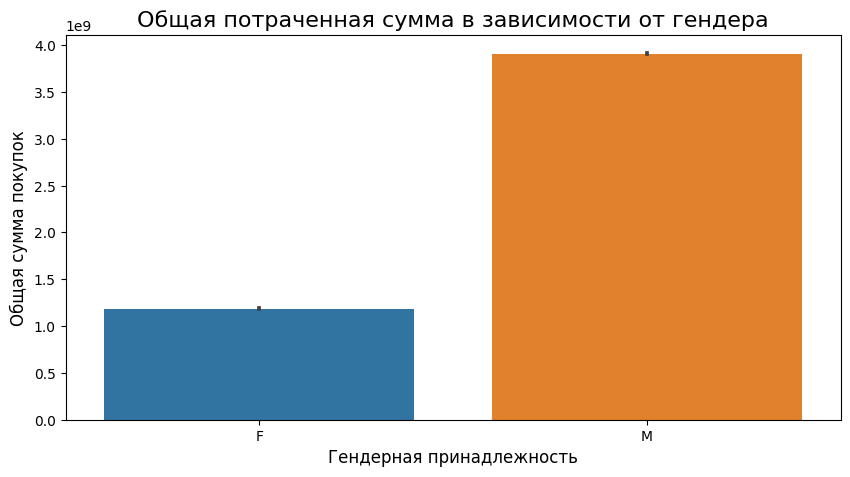

In [148]:
plt.figure(figsize=(10, 5))
sns.barplot(x='gender', y='purchase', data=df, estimator=sum)
plt.xlabel('Гендерная принадлежность', fontsize=12)
plt.ylabel('Общая сумма покупок', fontsize=12)
plt.title('Общая потраченная сумма в зависимости от гендера', fontsize=16);

In [149]:
df.groupby('gender')['purchase'].sum()

gender
F    1186232642
M    3909580100
Name: purchase, dtype: int64

### Количественный состав гендерных групп

Text(0.5, 1.0, 'Количество людей определенного гендера')

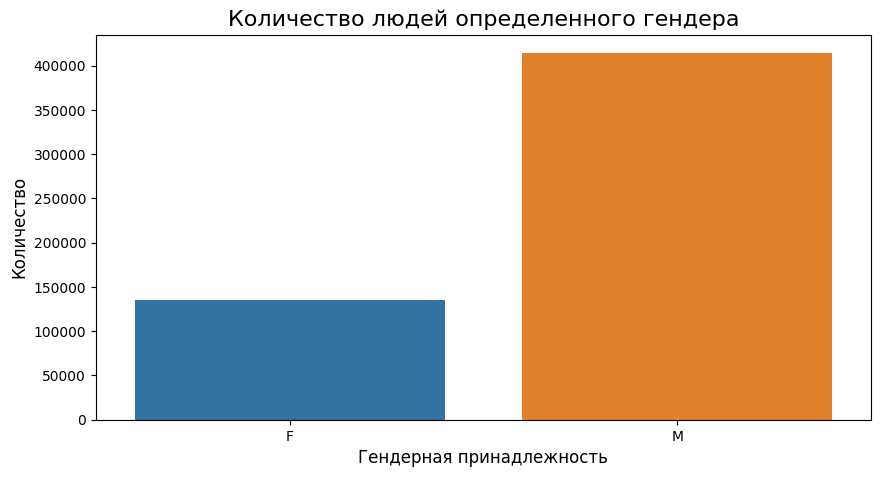

In [151]:
plt.figure(figsize=(10, 5))
sns.barplot(x='gender', y='user_id', data=df, estimator=len)
plt.xlabel('Гендерная принадлежность', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Количество людей определенного гендера', fontsize=16);

In [152]:
df.groupby('gender')['user_id'].count()

gender
F    135809
M    414259
Name: user_id, dtype: int64

### Общая потраченная сумма в зависимости от категории возраста

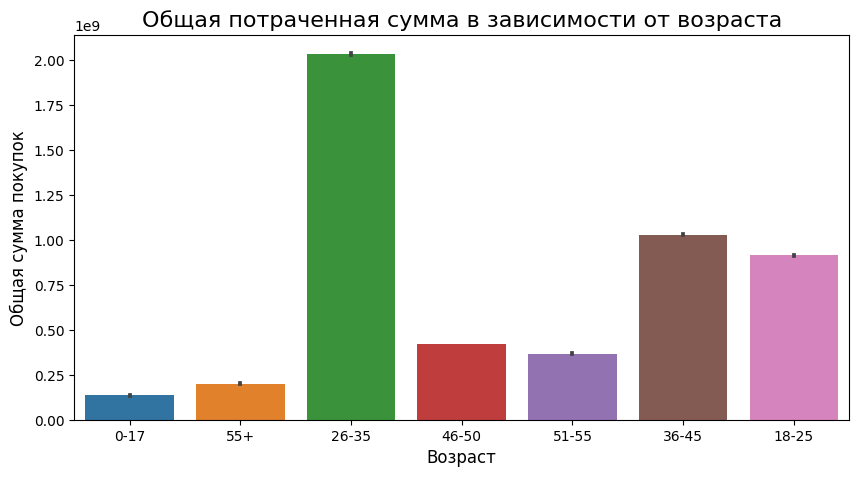

In [155]:
plt.figure(figsize=(10, 5))
sns.barplot(x='age', y='purchase', data=df, estimator=sum)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Общая сумма покупок', fontsize=12)
plt.title('Общая потраченная сумма в зависимости от возраста', fontsize=16);

In [156]:
df.groupby('age')['purchase'].sum()

age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: purchase, dtype: int64

### Количественный состав возрастных категорий по общей потраченной сумме

In [182]:
df.groupby('age')['purchase'].count().sort_values(ascending=False)

age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: purchase, dtype: int64

### Общая потраченная сумма в зависимости от занятости

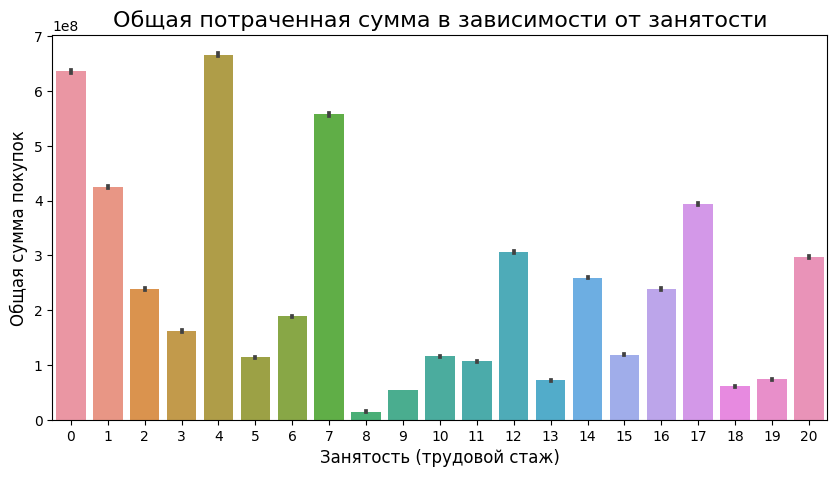

In [160]:
plt.figure(figsize=(10, 5))
sns.barplot(x='occupation', y='purchase', data=df, estimator=sum)
plt.xlabel('Занятость (трудовой стаж)', fontsize=12)
plt.ylabel('Общая сумма покупок', fontsize=12)
plt.title('Общая потраченная сумма в зависимости от занятости', fontsize=16);

In [162]:
df.groupby('occupation')['purchase'].sum().sort_values(ascending=False)

occupation
4     666244484
0     635406958
7     557371587
1     424614144
17    393281453
12    305449446
20    296570442
14    259454692
16    238346955
2     238028583
6     188416784
3     162002168
15    118960211
10    115844465
5     113649759
11    106751618
19     73700617
13     71919481
18     60721461
9      54340046
8      14737388
Name: purchase, dtype: int64

### Количественный состав в зависимости от занятости по общей потраченной сумме

In [184]:
df.groupby('occupation')['purchase'].count().sort_values(ascending=False)

occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: purchase, dtype: int64

### Общая потраченная сумма в зависимости от категории города

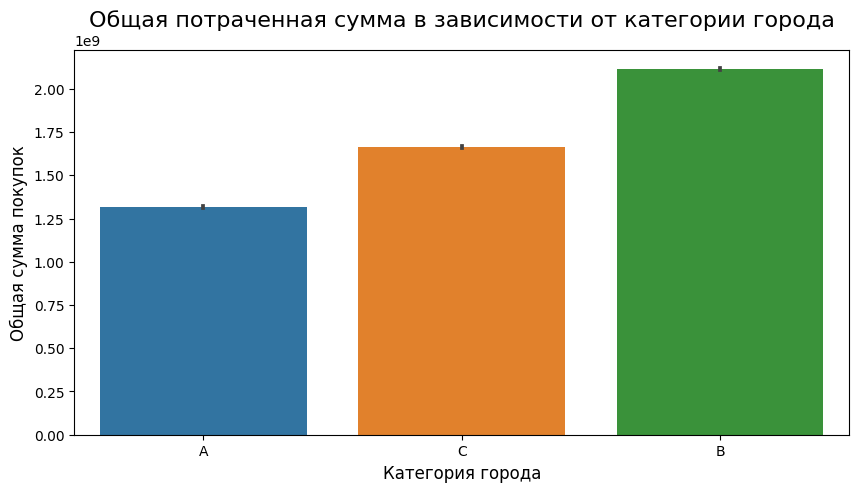

In [163]:
plt.figure(figsize=(10, 5))
sns.barplot(x='city_category', y='purchase', data=df, estimator=sum)
plt.xlabel('Категория города', fontsize=12)
plt.ylabel('Общая сумма покупок', fontsize=12)
plt.title('Общая потраченная сумма в зависимости от категории города', fontsize=16);

In [164]:
df.groupby('city_category')['purchase'].sum()

city_category
A    1316471661
B    2115533605
C    1663807476
Name: purchase, dtype: int64

###Общая потраченная сумма в зависимости от семейного положения

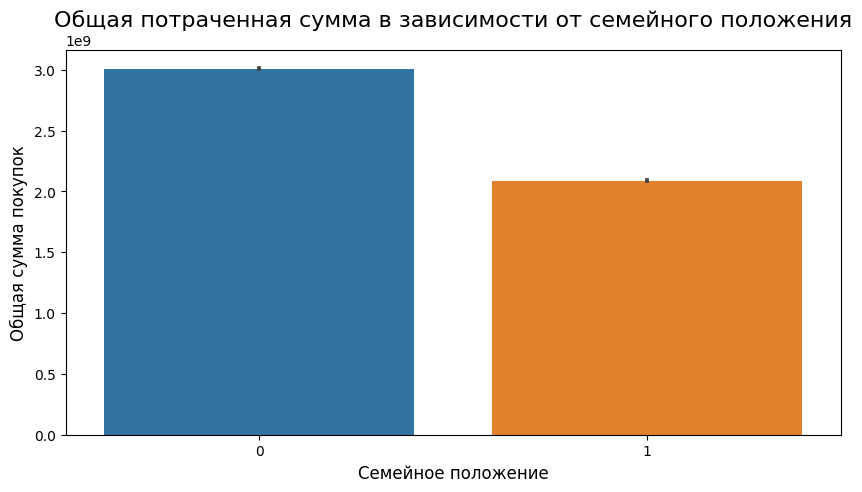

In [165]:
plt.figure(figsize=(10, 5))
sns.barplot(x='marital_status', y='purchase', data=df, estimator=sum)
plt.xlabel('Семейное положение', fontsize=12)
plt.ylabel('Общая сумма покупок', fontsize=12)
plt.title('Общая потраченная сумма в зависимости от семейного положения', fontsize=16);

In [166]:
df.groupby('marital_status')['purchase'].sum()

marital_status
0    3008927447
1    2086885295
Name: purchase, dtype: int64

### Количественный состав в зависимости от семейного положения по общей потраченной сумме

In [187]:
df.groupby('marital_status')['purchase'].count()

marital_status
0    324731
1    225337
Name: purchase, dtype: int64

###Общая потраченная сумма в зависимости от категории продукта № 1

Text(0.5, 1.0, 'Общая потраченная сумма в зависимости от категории продукта № 1')

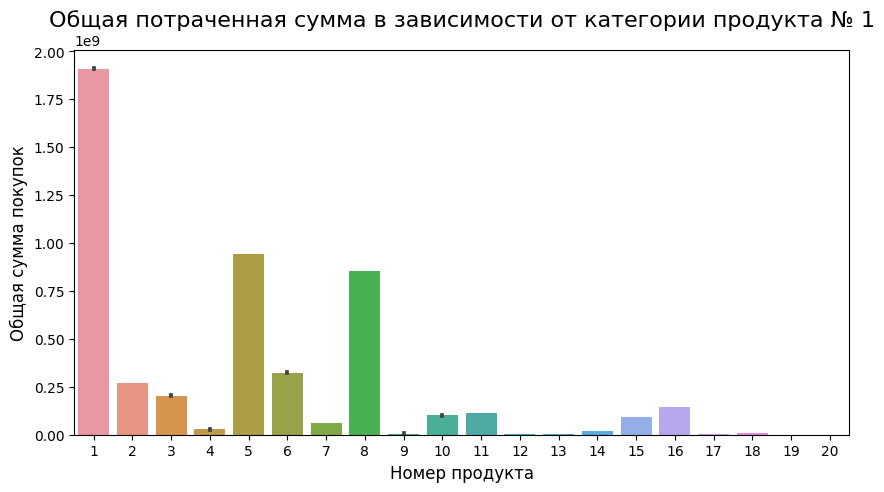

In [196]:
plt.figure(figsize=(10, 5))
sns.barplot(x='product_category_1', y='purchase', data=df, estimator=sum)
plt.xlabel('Номер продукта', fontsize=12)
plt.ylabel('Общая сумма покупок', fontsize=12)
plt.title('Общая потраченная сумма в зависимости от категории продукта № 1', fontsize=16)

In [195]:
df.groupby('product_category_1')['purchase'].sum().sort_values(ascending=False)

product_category_1
1     1910013754
5      941835229
8      854318799
6      324150302
2      268516186
3      204084713
16     145120612
11     113791115
10     100837301
15      92969042
7       60896731
4       27380488
14      20014696
18       9290201
9        6370324
17       5878699
12       5331844
13       4008601
20        944727
19         59378
Name: purchase, dtype: int64

###Общая потраченная сумма в зависимости от категории продукта № 2

Text(0.5, 1.0, 'Общая потраченная сумма в зависимости от категории продукта № 2')

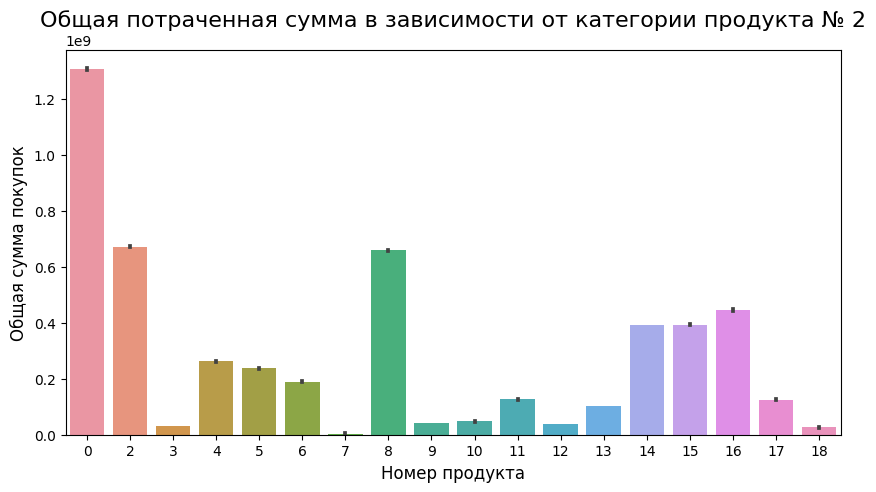

In [199]:
plt.figure(figsize=(10, 5))
sns.barplot(x='product_category_2', y='purchase', data=df, estimator=sum)
plt.xlabel('Номер продукта', fontsize=12)
plt.ylabel('Общая сумма покупок', fontsize=12)
plt.title('Общая потраченная сумма в зависимости от категории продукта № 2', fontsize=16)

In [197]:
df.groupby('product_category_2')['purchase'].sum().sort_values(ascending=False)

product_category_2
0     1305531230
2      670303864
8      658392656
16     445339722
15     392067176
14     391556939
4      262295485
5      236844899
6      189417477
11     126366165
17     125495400
13     101975384
10      47619084
9       41428000
12      38560412
3       32402777
18      25906260
7        4309812
Name: purchase, dtype: int64

### Общая потраченная сумма в зависимости от категории продукта № 3

Text(0.5, 1.0, 'Общая потраченная сумма в зависимости от категории продукта № 3')

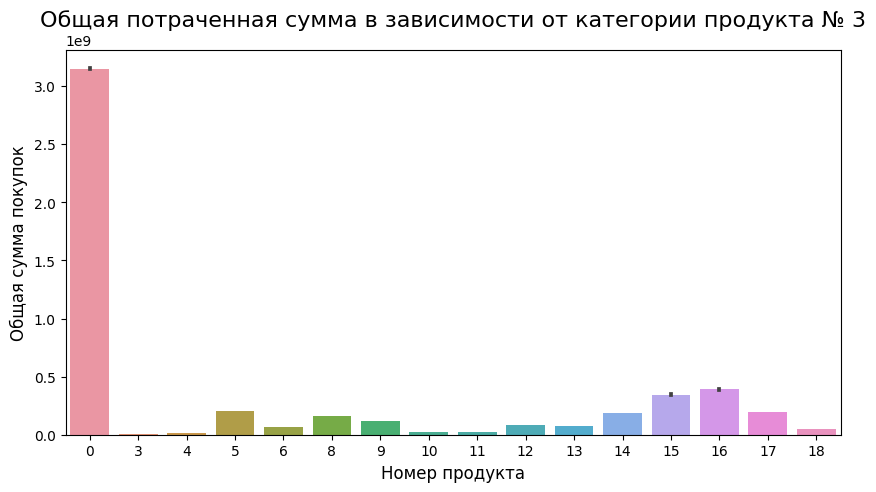

In [200]:
plt.figure(figsize=(10, 5))
sns.barplot(x='product_category_3', y='purchase', data=df, estimator=sum)
plt.xlabel('Номер продукта', fontsize=12)
plt.ylabel('Общая сумма покупок', fontsize=12)
plt.title('Общая потраченная сумма в зависимости от категории продукта № 3', fontsize=16)

In [198]:
df.groupby('product_category_3')['purchase'].sum().sort_values(ascending=False)

product_category_3
0     3150994343
16     391040983
15     345662769
5      201858094
17     196581588
14     185249212
8      163619031
9      120788622
12      80583631
13      71977563
6       64520181
18      50891137
10      23311034
11      21825045
4       18364475
3        8545034
Name: purchase, dtype: int64

### Общая потраченная сумма в зависимости от продолжительности пребывания в городе

Text(0.5, 1.0, 'Общая потраченная сумма в зависимости от продолжительности пребывания в городе')

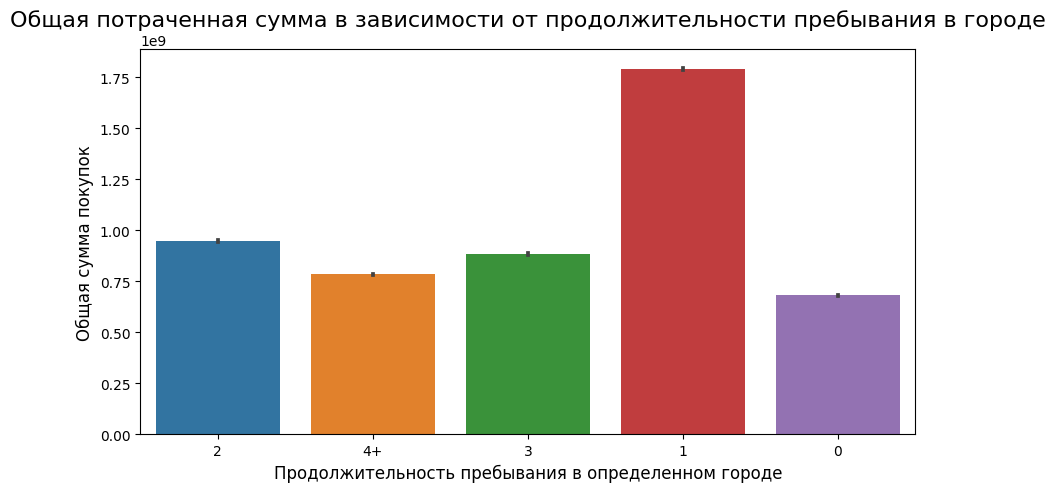

In [202]:
plt.figure(figsize=(10, 5))
sns.barplot(x='stay_in_current_city_years', y='purchase', data=df, estimator=sum)
plt.xlabel('Продолжительность пребывания в определенном городе', fontsize=12)
plt.ylabel('Общая сумма покупок', fontsize=12)
plt.title('Общая потраченная сумма в зависимости от продолжительности пребывания в городе', fontsize=16)

In [201]:
df.groupby('stay_in_current_city_years')['purchase'].sum().sort_values(ascending=False)

stay_in_current_city_years
1     1792872533
2      949173931
3      884902659
4+     785884390
0      682979229
Name: purchase, dtype: int64

### Процентная часть категории города от общего кол-ва

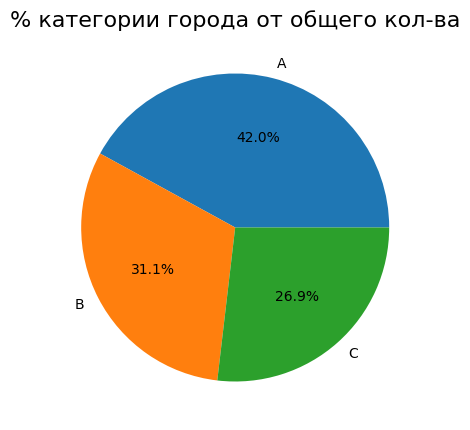

In [179]:
plt.figure(figsize=(10, 5))
plt.pie(df['city_category'].value_counts(), labels=["A", "B", "C"], autopct='%1.1f%%')
plt.title('% категории города от общего кол-ва', fontsize=16);

### Топ 5 пользователей с самыми высокими затратами

In [207]:
df.groupby('user_id').agg({'purchase':'sum'}).sort_values(by='purchase', ascending=False).head(5)

,purchase
user_id,
1004277,10536909
1001680,8699596
1002909,7577756
1001941,6817493
1000424,6573609


### Топ 5 самых часто покупаемых продуктов

In [209]:
df.groupby('product_id').agg({'purchase':'count'}).sort_values(by='purchase', ascending=False).head(5)

,purchase
product_id,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470


##<b>Общий вывод</b>

- Из общей суммы потраченных на покупки, мужчины потратили чуть больше <b>76 %</b> (<i>3 909 580 100</i>), на женщин пришлась остальная часть (<i>1 186 232 642</i>);
- По количественному составу, мужчин около <b>75 %</b> от общего числа <i>414 259</i> , женщин - <i>135 809</i>;
- Возрастная категори  <b>26-35</b> совершала всех больше покупок;
- Количественный состав категории <b>26-35</b> так же доминирует;
- В основном соверщают покупки люди со стажем от <b>0 до 4</b> лет, далее тендеция слегка снижается;
- Город категории <b>B</b> тратит больше, чем остальные категории по отдельности;
- Люди <b>не состоящие в браке</b> тратят больше;
- В первой категории продуктов, самый популярный продукт - <b>1</b>;
- Во второй категории продуктов, самый популрный продукт - <b>2</b>;
- В третьей категории продуктов, самый популрный продукт - <b>16</b>;
- Люди <b>с годом пребывания в городе</b> тратят больше, чем остальные;
- Данные о городах распределенные в процентном соотношении - <b>A - 42 %, B - 31 %, C - 27 %</b>;
- Клиент с <b>ID 1004277</b> потратил больше всех денег;
- Самый покупаемый товар с <b>ID P00265242</b>.